In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [18]:
url = 'https://github.com/Qalinle1996/DS-portofolio/raw/main/onkood.csv'
data = pd.read_csv(url)


This is a simple exploratory data analysis. the dataset used in the analysis is from onkod petroleum company and is collected manually by the author. the main focus in this EDA is data visualization. data cleaning was minimal in this project because of the small size of the dataset and the absence of missing and dirty data.

### Data cleaning

In [19]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)


In [20]:
# Convert the date column from object to the correct data type
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
# Create a day column from the date column
data['day'] = data['Date'].dt.day

In [22]:
#data

### Exploratory Data Analysis

The daily price per unit progression of both gas and patrol colored by the pump number. the first line is the patrol and the lower one is the gas.

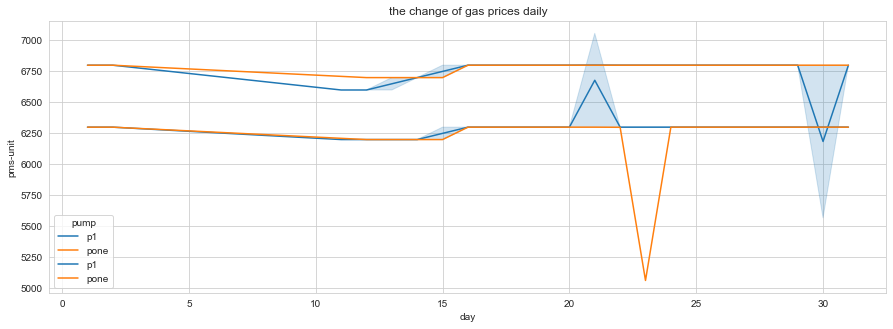

In [23]:
sns.set_style(style= 'whitegrid')
plt.figure(figsize= (15,5))
plt.title('the change of gas prices daily')
sns.lineplot(x= 'day', y = 'pms-unit', data= data, markers = True, hue = 'pump')
sns.lineplot(x= 'day', y = 'ago-unit', data= data, markers = True, hue = 'pump')
plt.show()

This is total liters sold of both gas and patrol grouped by day and sorted from the highest value to the lowest.

In [24]:
days = data.groupby('day')['total-ltrs-daily'].sum().to_frame().sort_values('total-ltrs-daily',ascending = False)
days['percentage from total'] =( days['total-ltrs-daily'] / days['total-ltrs-daily'].sum()) *100

days

,total-ltrs-daily,percentage from total
day,,
26,968.975,6.370891
19,844.430,5.552023
30,819.044,5.385113
18,787.200,5.175743
16,765.400,5.032411
17,760.437,4.999779
14,709.860,4.667242
13,700.520,4.605833
24,686.420,4.513127


A line chart visualization of the above data

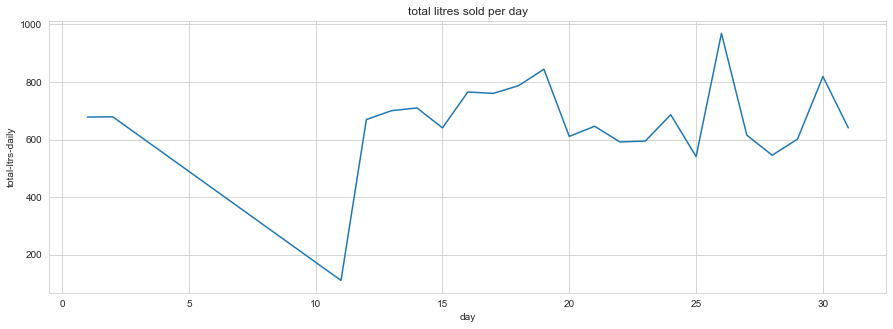

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,5))
plt.title('total litres sold per day')
sns.lineplot(x = 'day', y = 'total-ltrs-daily', data = days )
plt.show()

The chart below is the distribution of the petrol liters sold daily colored with the number of the pump.  in the p1 pump, 80-160 liters were the most frequent numbers in the dataset. also in pone pump, 240-200 liters were the most frequent. none of the pumps has reached a 300 liters in this dataset.

In [26]:
px.histogram(data , x = 'pms', template = 'simple_white',  color = 'pump')


The chart below is the distribution of the total amount of revenue calculated directly from the dataset not the daily revenue reported by the pump admins colored the reporting pump number. the average daily revenue calculated is between 1.5 million to 2 millions. the currency is of the local country.

In [27]:
px.histogram(data , x= 'account-calculated', color = 'pump' , opacity = 1)

The chart below is the distribution of the gas liters sold daily colored by the shift; '0' being night shift and '1' being day shift.  it looks like 50 liters is the average in the night shifts and 50-100 liters is the most frequent in the day shift. the is also some outliers in the day shift. we have only five instances that are larger than  150 liters.

In [28]:
px.histogram(data, x='ago', template='simple_white',  color = 'shift')


The chart below is the distribution of the patrol liters sold daily colored by the shift; '0' being night shift and '1' being day shift.  it looks like 80-120 liters are the average in the night shifts and 140-180 liters were the most frequent in the day shift. there is also 10 instances in the day shifts were number of liters were larger then 200 liters.

In [29]:
px.histogram(data, x = 'pms', template = 'simple_white', color = 'shift')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e4c3c4d-76e1-4e4e-8c39-308a84c62f4d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>